In [1]:
from matplotlib import pyplot as plt
from slab import datamanagement
from slab import dsfit
from slab import dataanalysis
from slab.datamanagement import SlabFile
from numpy import *
%matplotlib inline

sys.path.append(r'C:\Users\slab\Google Drive\grad school\schuster lab')
from data_cache import dataCacheProxy
from Analysis.Modules import common, fit, anal
from Analysis.Modules.static_surface import *

from IPython.display import Image

## Inductive coupling

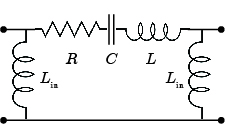

In [2]:
Image(filename=r'S:\Gerwin\Electron on helium\iPython notebooks\coupling_inductive.jpg')

With an inductive coupling, $S_{21}$ is given by

$$ S_{21} = \frac{2 Z_0 / L}{(1 - j q_{in}) (2 \delta \omega (q_{in} + j) + 2 Z_0/L)} $$

where I have assumed $R = 0$ in the figure above. In this case 

$$q_{in} = \frac{Z_0}{\omega L_{in}}$$, 

and $\delta \omega = \omega - \omega_0$

Predicted f0 = 11.01 GHz, loading due to coupling inductor is 91.02 MHz

f0 : 10923223505.643768 +/- 0.000414
FWHM : 743481.553401 +/- 0.000824
Gamma : 0.000034 +/- 0.000000
Amplitude : 1.000000 +/- 0.000000

Q = 14691
Z0 = 24.91 Ohm


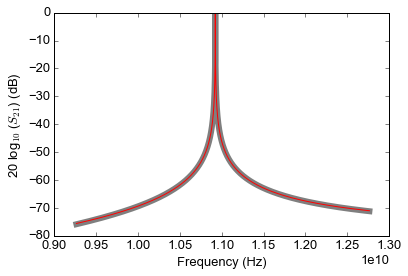

In [40]:
span = 3.5E9 # Hz

Z0 = 50.
L = 0.36E-9
Lin = L/120.
C = 0.58E-12
w0 = 1/sqrt(L*C)
w = linspace(w0-2*pi*span/2., w0+2*pi*span/2., 1E5)
dw = w-w0
qin = Z0/(w*Lin)

S21 = 2*Z0/L / ((1- 1j*qin) * (2*dw*(qin+1j) + 2*Z0/L))
center = w[argmax(abs(S21))]/(2*pi)
fitspan = 0.1E9
fit_guess = array([center, 0.5E6, 0.15, 1.0])

print "Predicted f0 = %.2f GHz, loading due to coupling inductor is %.2f MHz\n" % (w0/(2*pi*1E9), (w0/(2*pi)-center)/1E6)

plt.figure()
common.configure_axes(13)
plt.plot(w/(2*pi), 20*log10(abs(S21)), '-k', lw=6.0, alpha=0.5)
#plt.plot(w/(2*pi), 20*log10(dsfit.asym_lorfunc(w/(2*pi), *fit_guess)), color='r', lw=2.0)

fr = dsfit.fitlor_asym(w/(2*pi), array(abs(S21)**2, dtype=float64), domain=(center-fitspan/2., center+fitspan/2.), 
                       fitparams=fit_guess)
plt.plot(w/(2*pi), 10*log10(dsfit.asym_lorfunc(w/(2*pi), *fr[0])), 'r', lw=1.0)
plt.xlabel("Frequency (Hz)")
plt.ylabel("20 log$_{10}$ ($S_{21}$) (dB)")

print "\nQ = %d" % (fr[0][0]/fr[0][1])
print "Z0 = %.2f Ohm" %sqrt(L/C)

In [41]:
mu0 = 4*pi*1E-7
print "Inductor length ~ %.2f um" % (Lin/mu0 * 1E6)

Inductor length ~ 2.39 um


## Capacitive coupling

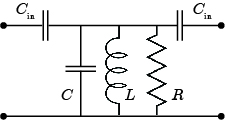

In [3]:
Image(filename=r'S:\Gerwin\Electron on helium\iPython notebooks\coupling_capacitive.jpg')

With capacitive coupling, and resistance $R$ included, the $S_{21}$ is given by 

$$S_{21} = \frac{2 q_{in}^2}{(1- j q_{in}) (\gamma + j q_{in} (\gamma + 2) + 2 j Z_0 C \delta \omega (1 + j q_{in}))}$$

Here $\gamma = Z_0/R$. Setting $R \rightarrow \infty$ or $\gamma \rightarrow 0$ represents the zero loss case. Futhermore $q_{in} = \omega C_{in} Z_0$ defines the input coupling in the following way: 

$$ Q_{c} = \frac{\pi}{2} \frac{1}{(q_{in}^2 + q_{out}^2)} = \frac{\pi}{4 q_{in}^2}$$. 

We can also write down an expression for $S_{11}$: 

$$ S_{11} = \frac{\gamma + 2j Z_0 C \delta \omega + 2 j q_{in} + q_{in}^2 (\gamma + 2j Z_0 C \delta \omega)}{(1- j q_{in}) (\gamma + j q_{in} (\gamma + 2) + 2 j Z_0 C \delta \omega (1 + j q_{in}))} $$

Predicted f0 = 10.07 GHz, loading due to coupling capacitor is 40.10 MHz

f0 : 10025741033.785543 +/- 0.000036
FWHM : 566621.634711 +/- 0.000065
Gamma : 0.000028 +/- 0.000000
Amplitude : 0.888094 +/- 0.000000

Q0 = 17693
Qi = 178983
Qc = 19634
Z0 = 31.62 Ohm


(10023241519.888397, 10028241519.888397)

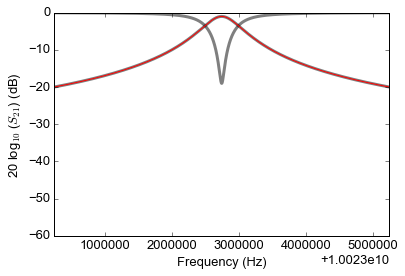

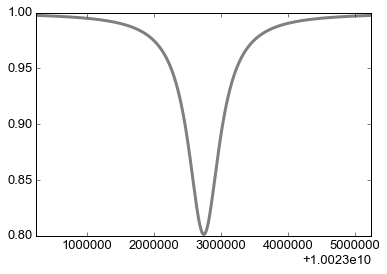

In [9]:
span = 0.10E9 # Hz

gamma = 1e-5
Z0 = 50.
L = 0.5E-9
C = 0.5E-12
Cin = C/250.
w0 = 1/sqrt(L*C)
w = linspace(w0-2*pi*span/2., w0+2*pi*span/2., 1E5)
dw = w-w0
qin = w*Z0*Cin

S21 = 2*qin**2 / ((1-1j*qin) * (gamma + 1j*qin*(gamma+2.) + 2*1j*Z0*C*dw*(1+1j*qin)))
S11 = (gamma + 2*1j*Z0*C*dw + 2*1j*qin + qin**2*(gamma + 2*1j*Z0*C*dw))/\
((1-1j*qin) * (gamma + 1j*qin*(gamma+2.) + 2*1j*Z0*C*dw*(1+1j*qin)))
center = w[argmax(abs(S21))]/(2*pi)
fitspan = 0.005E9
fit_guess = array([center, 1E6, 0, 1])

print "Predicted f0 = %.2f GHz, loading due to coupling capacitor is %.2f MHz\n" % (w0/(2*pi*1E9), (w0/(2*pi)-center)/1E6)

plt.figure()
common.configure_axes(13)
plt.plot(w/(2*pi), 20*log10(abs(S21)), '-k', lw=3.0, alpha=0.5)
plt.plot(w/(2*pi), 20*log10(abs(S11)), '-k', lw=3.0, alpha=0.5)
#plt.plot(w/(2*pi), 20*log10(dsfit.asym_lorfunc(w/(2*pi), *fit_guess)), color='r', lw=2.0)

fr = dsfit.fitlor_asym(w/(2*pi), array(abs(S21)**2, dtype=float64), domain=(center-fitspan/2., center+fitspan/2.), 
                       fitparams=fit_guess)
plt.plot(w/(2*pi), 10*log10(dsfit.asym_lorfunc(w/(2*pi), *fr[0])), 'r', lw=1.0)
plt.xlabel("Frequency (Hz)")
plt.ylabel("20 log$_{10}$ ($S_{21}$) (dB)")

Q0 = fr[0][0]/fr[0][1]
Qc = pi/2. * 1/(2*qin[common.find_nearest(0, dw)]**2)
Qi = Qc*Q0/(Qc-Q0)

print "\nQ0 = %d" % (Q0)
print "Qi = %d" % (Qi)
print "Qc = %d" % (Qc) 
print "Z0 = %.2f Ohm" %sqrt(L/C)

plt.xlim(center-fitspan/2., center+fitspan/2.)


plt.figure()
common.configure_axes(13)
plt.plot(w/(2*pi), abs(S21)**2 + abs(S11)**2, '-k', lw=3.0, alpha=0.5)
plt.xlim(center-fitspan/2., center+fitspan/2.)

## Final check to see if this makes sense

Predicted f0 = 10.07 GHz, loading due to coupling inductor is 1000.00 MHz



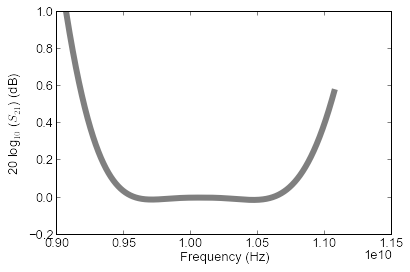

In [173]:
span = 2E9 # Hz

gamma = 0
Z0 = 50.
L = 0.5E-9
Lin = L/1000.
C = 0.5E-12
w0 = 1/sqrt(L*C)
w = linspace(w0-2*pi*span/2., w0+2*pi*span/2., 1E5)
dw = w-w0
qin = w0*Z0*C

a = sqrt((gamma**2 + (2*L/Z0)**2 * dw**2))/(w*Lin)
b = 1-a

S21 = a/(1+1j*dw*qin/w0 + gamma/2.) + b/(1 + 1j*w*Lin/(2*Z0))
center = w[argmax(abs(S21))]/(2*pi)
fitspan = 0.05E9
fit_guess = array([center, 1E6, 0, 1])

print "Predicted f0 = %.2f GHz, loading due to coupling inductor is %.2f MHz\n" % (w0/(2*pi*1E9), (w0/(2*pi)-center)/1E6)

plt.figure()
common.configure_axes(13)
plt.plot(w/(2*pi), 20*log10(abs(S21)), '-k', lw=6.0, alpha=0.5)
#plt.plot(w/(2*pi), 20*log10(dsfit.asym_lorfunc(w/(2*pi), *fit_guess)), color='r', lw=2.0)

#fr = dsfit.fitlor_asym(w/(2*pi), array(abs(S21), dtype=float64), domain=(center-fitspan/2., center+fitspan/2.), 
#                       fitparams=fit_guess)
#plt.plot(w/(2*pi), 20*log10(dsfit.asym_lorfunc(w/(2*pi), *fr[0])), 'r', lw=1.0)
plt.xlabel("Frequency (Hz)")
plt.ylabel("20 log$_{10}$ ($S_{21}$) (dB)")

#print "\nQ = %d" % (fr[0][0]/fr[0][1])
#print "Z0 = %.2f Ohm" %sqrt(L/C)

In [175]:
a

array([ 4.41216581,  4.41206784,  4.41196986, ...,  3.61459553,
        3.61466129,  3.61472706])